<a href="https://colab.research.google.com/github/CIFU1104/Computaci-n-Cu-ntica/blob/main/Computacion_Cuantica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr>

# Introducción a la Programación Cuántica usando Qiskit
<hr>


Primero instalamos el módulo *qiskit* y la librería *pylatexenc* para dibujar los diagramas con matplotlib


In [ ]:
!pip install qiskit[machine-learning]
!pip install pylatexenc # instalamos la librería *pylatexenc* para dibujar circuitos con matplotlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
import qiskit
qiskit.__qiskit_version__

## Compuertas Cuánticas

Recordemos que
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

 para la compuerta X de Pauli

$$ X =\ket{0}\bra{1} + \ket{1}\bra{0}$$

$$ X \ket{0} = \ket{1}$$
$$ X \ket{1} = \ket{0}$$

para la compuerta Y de Pauli
$$ Y =-i\ket{0}\bra{1} + i\ket{1}\bra{0}$$

$$ Y \ket{0}= i\ket{1}$$
$$ Y \ket{1}= -i\ket{0}$$

para la compuerta Z de Pauli
$$ Z =\ket{0}\bra{0} - \ket{1}\bra{1}$$

$$ Z \ket{0}= \ket{0} $$
$$ Z \ket{1}= -\ket{1} $$

Para la compuerta H de Hadamard
$$ H =\frac{\ket{0}+\ket{1}}{\sqrt{2}} \bra{0}+ \frac{\ket{0}-\ket{1}}{\sqrt{2}} \bra{1}$$

$$ H \ket{0} =\frac{\ket{0}+\ket{1}}{\sqrt{2}}$$
$$ H \ket{1} =\frac{\ket{0}-\ket{1}}{\sqrt{2}}$$

para la compuerta CNOT aplicada a 2 quibits, el primer bit (el que está a la derecha), se llama de control y el segundo se llama objetivo. Si el qubit de control es 1 el qubit objetivo se niega.

$$ CNOT \ket{00}= \ket{00}$$
$$ CNOT \ket{01}= \ket{11}$$
$$ CNOT \ket{10}= \ket{10}$$
$$ CNOT \ket{11}= \ket{01}$$




## Un Primer Circuito Cuántico Arbitrario

Ahora hacemos un primer circuito cuántico arbitrario en *qiskit*.

*Nota: El estado inicial de los qubits es $\ket{0}$*

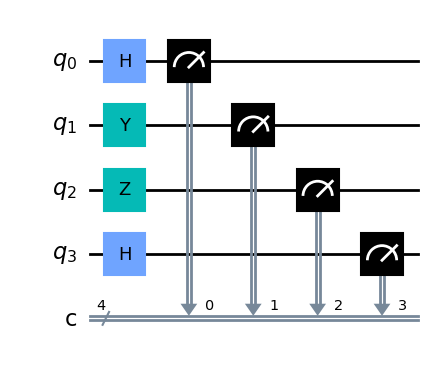

In [ ]:
from qiskit import QuantumCircuit, Aer
import numpy as np
import qiskit.quantum_info as qi
qc = QuantumCircuit(4,4) # Ponemos 4 qubits y 4 bits
# Aplicamos algunas compuertas
qc.h(0)
qc.y(1)
qc.z(2)
qc.h(3)
stv = qi.Statevector.from_instruction(qc)
# Ahora hacemos mediciones de cada qubit
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.draw(output='mpl')

Se puede cambiar el color de fondo del circuito

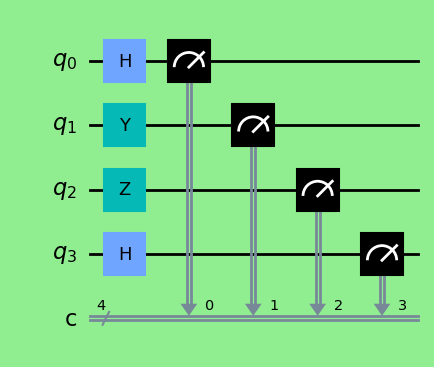

In [ ]:
from qiskit import QuantumCircuit, Aer
import numpy as np
import qiskit.quantum_info as qi
qc = QuantumCircuit(4,4) # Ponemos 4 qubits y 4 bits
# Aplicamos algunas compuertas
qc.h(0)
qc.y(1)
qc.z(2)
qc.h(3)
stv = qi.Statevector.from_instruction(qc)
# Ahora hacemos mediciones de cada qubit
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
style = {'backgroundcolor': 'lightgreen'}
qc.draw(output='mpl', style=style)

Las compuertas cuánticas aplicadas se expresan matemáticamente del modo siguiente:

$$
\begin{align*} (H \otimes Z \otimes Y \otimes X) |0000\rangle =\frac{\ket{0}+\ket{1}}{\sqrt{2}} \otimes|0\rangle\otimes i|1\rangle\otimes |1\rangle = \frac{i}{\sqrt{2}}|0011\rangle+ \frac{i}{\sqrt{2}}|1011\rangle
\end{align*}
$$


El mismo resultado se obtiene con qiskit   para el  estado del sistema antes de las mediciones con la líneas

*stv = qi.Statevector.from_instruction(qc)*

y

*stv.draw('latex', prefix="|\\psi\\rangle =")*



In [ ]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

Enseguida simulamos este circuito usando el *backend qasm_simulator* y mostramos los resultados estadísticos de ejecutarlo muchas veces.

Nota: La notación de *qiskit* pone el qubit más significativo a la izquierda igual que en los números binarios.

{'1010': 233, '0010': 266, '0011': 259, '1011': 242}


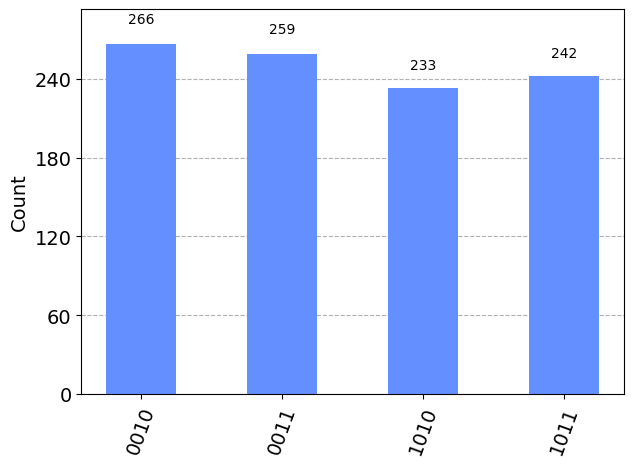

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1000)
print(job.result().get_counts())
plot_histogram(job.result().get_counts())

## Circuito Cuántico para Superposición Simétrica

Para poner en superposición uniforme a todos los qubits aplicamos la compuerta de Hadamard a todos los qubits

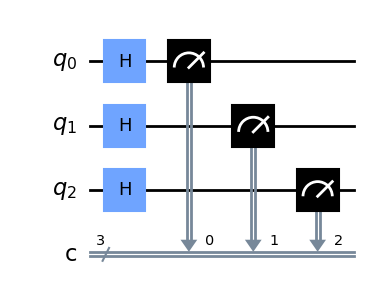

In [ ]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
qc = QuantumCircuit(3,3)
for qubit in range(3):
  qc.h(qubit)
stv = qi.Statevector.from_instruction(qc)
for qubit in range(3):
  qc.measure(qubit,qubit)
qc.draw("mpl")

Las compuertas cuánticas aplicadas se expresan matemáticamente del modo siguiente:

$$
\begin{align*} (H \otimes H \otimes H ) |000\rangle =\frac{\ket{0}+\ket{1}}{\sqrt{2}} \otimes\frac{\ket{0}+\ket{1}}{\sqrt{2}}\otimes \frac{\ket{0}+\ket{1}}{\sqrt{2}}
\end{align*}
$$

$$
\begin{align*}
= \frac{1}{2\sqrt{2}}(|000\rangle+ |001\rangle+ |010\rangle+ |011\rangle+ |100\rangle+ |101\rangle+ |110\rangle+ |111\rangle)
\end{align*}
$$


Usando qiskit obtenemos el mismo resultado para el estado del sistema antes de las mediciones:

In [ ]:
stv.draw('latex', prefix="|\\psi\\rangle =")


Noten que si aplicamos un operador al estado cuántico $|\psi\rangle$ lo estamos aplicando simultaneamente a todos los estados

$|000\rangle$,$|001\rangle$, ...., $|111\rangle$.

Esto se llama **paralelismo cuántica** y es una de la ventajas de la computación cuántica.

Enseguida simulamos este circuito

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1000)
print(job.result().get_counts())
plot_histogram(job.result().get_counts())

## Circuito Cuántico para el Experimento de los 3 Polarizadores


Empezamos con 1000 fotones polarizados verticalmente, que representamos por su qubit en el estado $|0\rangle$ y los medimos con un polarizador a 90 grados que equivale a medir el qubit en el estado $|1\rangle$ (rotado 180 grados)

In [ ]:
from qiskit import QuantumCircuit, Aer
import qiskit.quantum_info as qi
qc = QuantumCircuit(1,1)
qc.measure(0,0)
qc.draw("mpl")

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1000)
print(job.result().get_counts())
plot_histogram(job.result().get_counts())

Vemos que no llega ningún qubit en el estado $|1\rangle$ (todos llegan con el mismo estado $|0\rangle$).

Otra base posible es la base X dada por

$|+\rangle =\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$

y

$|-\rangle =\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$


Vemos que

$|0\rangle =\frac{1}{\sqrt{2}}(|+\rangle+|-\rangle)$

y

$|1\rangle =\frac{1}{\sqrt{2}}(|+\rangle-|-\rangle)$

Es decir que la probabilidad de medir

$|+\rangle$ para un estado  $|0\rangle$

es del 50%

y la probabilidad de volver a medir  

$|0\rangle$ para un estado  $|+\rangle$

es otra vez del 50%

Colocar el polarizador de enmedio a 45 grados equivale a hacer la medición en la
base X.


Ahora hacemos una medición intermedia en una base rotada 90 grados en el plano XZ (base X) .

Requerimos entender cómo hacer una medición en bases rotadas a ángulos arbitrarios $\theta$ y $\phi$.

Partiendo de los 2 estados cuánticos ortogonales
$$
|\psi\rangle = \cos({\frac{\theta}{2}})|0\rangle +e^{i\phi} \sin({\frac{\theta}{2}})|1\rangle=\begin{pmatrix} \cos({\frac{\theta}{2}}) \\\\ e^{i\phi}\sin({\frac{\theta}{2}}) \end{pmatrix}
$$
y

$$
|\psi^{'}\rangle =\cos({\frac{\pi-\theta}{2}})|0\rangle +e^{i(\pi+\phi)} \sin({\frac{\pi-\theta}{2}})|1\rangle=\begin{pmatrix} \sin({\frac{\theta}{2}}) \\\\ -e^{i\phi}\cos({\frac{\theta}{2}}) \end{pmatrix}
$$

vemos que los operadores unitarios de rotación


$$R_Y(\theta) = \exp\left(-i \frac{\theta}{2} Y\right) =
    \begin{pmatrix}
        \cos{\frac{\theta}{2}} & -\sin{\frac{\theta}{2}} \\
        \sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
    \end{pmatrix}
$$

y

$$R_Z(\phi) = \exp\left(-i \frac{\phi}{2} Z\right) =
    \begin{pmatrix}
        e^{-i\phi/2} & 0 \\
       0 & e^{i\phi/2}
    \end{pmatrix}
$$



transforman la base  $\{|\psi\rangle, |\psi^{'}\rangle\}$ en la base computacional
$\{|0\rangle, |1\rangle\}$ (salvo una fase)
$$
R_Y(-\theta) R_Z(-\phi)|\psi\rangle =\begin{pmatrix}
        \cos{\frac{\theta}{2}} & \sin{\frac{\theta}{2}} \\
        -\sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
    \end{pmatrix}
    \begin{pmatrix}
        e^{i\phi/2} & 0 \\
       0 & e^{-i\phi/2}
    \end{pmatrix}
    \begin{pmatrix} \cos({\frac{\theta}{2}}) \\\\ e^{i\phi}\sin({\frac{\theta}{2}}) \end{pmatrix} =e^{i\phi/2}
    \begin{pmatrix} 1 \\\\ 0 \end{pmatrix}
    =e^{i\phi/2}|0\rangle
$$
$$
R_Y(-\theta) R_Z(-\phi)|\psi^{'}\rangle =\begin{pmatrix}
        \cos{\frac{\theta}{2}} & \sin{\frac{\theta}{2}} \\
        -\sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
    \end{pmatrix}
    \begin{pmatrix}
        e^{i\phi/2} & 0 \\
       0 & e^{-i\phi/2}
    \end{pmatrix}
    \begin{pmatrix} \sin({\frac{\theta}{2}}) \\\\ -e^{i\phi}\cos({\frac{\theta}{2}}) \end{pmatrix}  =e^{i\phi/2}
    \begin{pmatrix} 0 \\\\ 1 \end{pmatrix}
    =e^{i\phi/2}|1\rangle
$$

De modo que para medir un qubit en la base $\{|\psi\rangle, |\psi^{'}\rangle\}$ basta con aplicar $R_Y(-\theta) R_Z(-\phi)$ a ese qubit justo antes de medirlo en la base computacional $\{|0\rangle, |1\rangle\}$ de Qiskit.

En este caso $\theta=\pi/2$ y $\phi=0$.

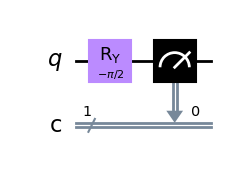

In [ ]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
import numpy as np
qc = QuantumCircuit(1,1)
qc.ry(-np.pi/2,0)
stv = qi.Statevector.from_instruction(qc)

qc.measure(0,0)
qc.draw("mpl")

In [ ]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1000)
print(job.result().get_counts())
plot_histogram(job.result().get_counts())

Vemos que 471 pasan el filto de que están en el estado $|+\rangle =\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$

Enseguida empezamos con esos 471 qubits y los medimos en la base computacional que equivale a pasar los fotones por el tercer polarizador.

In [ ]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
qc = QuantumCircuit(1,1)
qc.ry(np.pi/2,0)
stv = qi.Statevector.from_instruction(qc)

qc.measure(0,0)
qc.draw("mpl")

In [ ]:
stv.draw('latex', prefix="|\\psi\\rangle =")

In [ ]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(stv)

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=471)
print(job.result().get_counts())
plot_histogram(job.result().get_counts())

Vemos que en promedio un 25% pasan el tercer filtro de que están en el estado $|1\rangle$

## Uso de una Computadora Cuántica Real de IBM Quantum Experience

Lo primero es registrarse en


https://quantum-computing.ibm.com/

Una vez que el email se verifica ya tendremos una CLAVE de acceso y la guardamos con

In [ ]:
from qiskit import IBMQ
#IBMQ.save_account('CLAVE', overwrite=True)


Para obtener la lista de computadoras reales disponibles usar el código siguiente:


In [ ]:
from qiskit import IBMQ
IBMQ.load_account() # Load account from disk
print(IBMQ.providers())    # List all available providers
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

## Cálculo de Valores de Expectación de Operadores

Primero definimos el estado cuántico $|\psi\rangle$ y el operador usando **qiskit.opflow**.

Por ejemplo para calcular
$$
\langle\psi|X\otimes X\otimes X|\psi\rangle
$$  

para
$$  |\psi\rangle =\frac{\ket{000}+\ket{111}}{\sqrt{2}}$$

lo podemos hacer del modo siguiente en Qiskit.




In [ ]:
from qiskit import QuantumCircuit
from qiskit.opflow import CircuitOp,Zero, One, Z, X,Y,I
import numpy as np
psi = 1 / np.sqrt(2) * ((One ^ One^ One) + (Zero ^ Zero^ Zero))
qc=QuantumCircuit(3)
qc.x(0)
qc.x(1)
qc.x(2)
op=CircuitOp(qc)
from IPython.display import display, Latex,Math
display(Math('|\psi> = \\frac{1}{\sqrt{2}}(|0>|0>|0>+|1>|1>|1>)'))
display(Latex(f'$<\psi|X\otimes X\otimes X|\psi>$'))
print("=",np.round(psi.adjoint().compose(op).compose(psi).eval().real,1))

/var/folders/rx/zh1y5ms50b319n8snxdmd_j00000gn/T/ipykernel_5627/3102407573.py:9: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.circuit_op.CircuitOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  op=CircuitOp(qc)


<IPython.core.display.Math object>

<IPython.core.display.Latex object>

= 1.0


O simplificarlo más en la definición del operador, como se muestra a continuación

In [ ]:
from qiskit import QuantumCircuit
from qiskit.opflow import CircuitOp,Zero, One, Z, X,Y,I
import numpy as np
psi = 1 / np.sqrt(2) * ((One ^ One^ One) + (Zero ^ Zero^ Zero))
op = X^X^X
from IPython.display import display, Latex,Math
display(Math('|\psi> = \\frac{1}{\sqrt{2}}(|0>|0>|0>+|1>|1>|1>)'))
display(Latex(f'$<\psi|Op|\psi>$'))
print("=",np.round(psi.adjoint().compose(op).compose(psi).eval().real,1))


<IPython.core.display.Math object>

<IPython.core.display.Latex object>

= 1.0


Por ejemplo para calcular
$$
\langle\psi|XX+YY+ZZ|\psi\rangle
$$  

para
$$  |\psi\rangle =\ket{0}$$

lo podemos hacer del modo siguiente:


In [ ]:
from qiskit import QuantumCircuit
from qiskit.opflow import CircuitOp,Zero, One, Z, X,Y,I
import numpy as np
psi = Zero
from IPython.display import display, Latex,Math
display(Math('|\psi> = |0>'))
display(Latex(f'$<\psi|XX|\psi>$'))
print("=",np.round(psi.adjoint().compose(X).compose(X).compose(psi).eval().real,1))
display(Latex(f'$<\psi|YY|\psi>$'))
print("=",np.round(psi.adjoint().compose(Y).compose(Y).compose(psi).eval().real,1))
display(Latex(f'$<\psi|YY|\psi>$'))
print("=",np.round(psi.adjoint().compose(Z).compose(Z).compose(psi).eval().real,1))


<IPython.core.display.Math object>

<IPython.core.display.Latex object>

= 1.0


<IPython.core.display.Latex object>

= 1.0


<IPython.core.display.Latex object>

= 1.0


In [ ]:
from qiskit import QuantumCircuit
from qiskit.opflow import CircuitOp,Zero, One, Z, X,Y,I
import numpy as np
psi = One
from IPython.display import display, Latex,Math
display(Math('|\psi> = |1>'))
display(Latex(f'$<\psi|XX|\psi>$'))
print("=",np.round(psi.adjoint().compose(X).compose(X).compose(psi).eval().real,1))
display(Latex(f'$<\psi|YY|\psi>$'))
print("=",np.round(psi.adjoint().compose(Y).compose(Y).compose(psi).eval().real,1))
display(Latex(f'$<\psi|YY|\psi>$'))
print("=",np.round(psi.adjoint().compose(Z).compose(Z).compose(psi).eval().real,1))


<IPython.core.display.Math object>

<IPython.core.display.Latex object>

= 1.0


<IPython.core.display.Latex object>

= 1.0


<IPython.core.display.Latex object>

= 1.0


De modo que
$$
\langle\psi|XX+YY+ZZ|\psi\rangle = 3
$$  

para
$$  |\psi\rangle =\ket{0}$$
y
$$  |\psi\rangle =\ket{1}$$


Recuérdese que el operador de spin es
$$
S= \frac{\hbar}{2}(\hat iX+\hat jY+\hat kZ)
$$


Para un electrón es
$$
S^2 \mid s,m_z\rangle = s(s+1) \hbar^2 \mid s,m_z\rangle=\frac{3}{4}\hbar^2 \mid s,m_z\rangle
$$
con $s=\frac{1}{2}$


In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.opflow import CircuitOp,Zero, One, Z, X,Y,I
import numpy as np
psi = 1 / np.sqrt(2) * ((One ^One ^ Zero^ Zero) - (Zero ^Zero ^ One^ One))
op1 = -0.8105479805373275 * I^I^I^I + 0.1721839326191556 * I^I^I^Z - 0.2257534922240239 * I^I^Z^I \
+ 0.17218393261915554 * I^Z^I^I - 0.2257534922240239 * Z^I^I^I
# Step 1: Define operator
op = SparsePauliOp.from_list(
    [
        ("IIII", -0.8105479805373275),
        ("IIIZ", + 0.1721839326191556),
        ("IIZI", - 0.2257534922240239),
        ("IZII", + 0.17218393261915554),
        ("ZIII", - 0.2257534922240239),
        ("IIZZ", + 0.12091263261776629),
        ("IZIZ", + 0.16892753870087907),
        ("YYYY", + 0.04523279994605784),
        ("XXYY", + 0.04523279994605784),
        ("YYXX", + 0.04523279994605784),
        ("XXXX", + 0.04523279994605784),
        ("ZIIZ", + 0.16614543256382414),
        ("IZZI", +0.16614543256382414),
        ("ZIZI", + 0.17464343068300445),
        ("ZIZI", + 0.12091263261776629),

    ]
)
# Step 2: Define quantum state
state = QuantumCircuit(4)
state.h(0)
state.h(1)
state.x(2)
from qiskit.primitives import Estimator

estimator = Estimator()

expectation_value = estimator.run(state, op).result().values

# for shot-based simulation:
expectation_value = estimator.run(state, op, shots=1000).result().values
print("expectation: ", expectation_value)

print("=",np.round(psi.adjoint().compose(op1).compose(psi).eval().real,16))

expectation:  [-1.20305045]
= -0.6676191210039676
